In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


From the top FTSE 100
I selected
AstraZeneca - AZN
Shell - SHEL
HSBC - HSBA
Unilever Group - ULVR
Bristish American Tobacco - BATS

In [4]:
# Load stock data

AstraZeneca = yf.download('AZN.L', start='2014-01-01', end='2023-01-01')
Shell = yf.download('SHEL.L', start='2014-01-01', end='2023-01-01')
HSBC = yf.download('HSBA.L', start='2014-01-01', end='2023-01-01')
Unilever = yf.download('ULVR.L', start='2014-01-01', end='2023-01-01')
BritishTobacco = yf.download('BATS.L', start='2014-01-01', end='2023-01-01')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
# Function to format data

def format(df):
  df.reset_index(inplace=True)
  df['Date'] = pd.to_datetime(df['Date'])
  df = df.set_index('Date')
  df['Return'] = df['Adj Close'].pct_change()
  df.dropna(inplace=True)
  df = df[['Adj Close']]
  return df

In [6]:
AstraZeneca = format(AstraZeneca)
Shell = format(Shell)
HSBC = format(HSBC)
Unilever = format(Unilever)
BritishTobacco = format(BritishTobacco)

In [ ]:
BritishTobacco.head()

,Adj Close
Date,
2014-01-06,1679.639282
2014-01-07,1669.158691
2014-01-08,1652.916260
2014-01-09,1630.384155
2014-01-10,1616.236450


In [7]:
# Merge the DataFrames on the 'Date' column
merged_df = pd.merge(AstraZeneca, Shell, on='Date', suffixes=('_AstraZeneca', '_Shell'))
merged_df = pd.merge(merged_df, HSBC, on='Date')
merged_df = pd.merge(merged_df, Unilever, on='Date', suffixes=('_HSBC', '_Unilever'))
merged_df = pd.merge(merged_df, BritishTobacco, on='Date')
merged_df.reset_index(inplace=True)
merged_df.columns = ['Date', 'Adj_Close_AstraZeneca', 'Adj_Close_Shell', 'Adj_Close_HSBC', 'Adj_Close_Unilever', 'Adj_Close_BritishTobacco']
merged_df.head()

,Date,Adj_Close_AstraZeneca,Adj_Close_Shell,Adj_Close_HSBC,Adj_Close_Unilever,Adj_Close_BritishTobacco
0,2014-01-03,2490.231689,1226.886597,365.535919,1716.980957,1676.757324
1,2014-01-06,2499.261475,1220.350098,367.540710,1714.172241,1679.639160
2,2014-01-07,2474.258057,1227.170288,376.339355,1715.577271,1669.159668
3,2014-01-08,2465.229248,1218.360107,375.615540,1691.700317,1652.916382
4,2014-01-09,2481.203125,1219.213135,372.051453,1664.312988,1630.384399


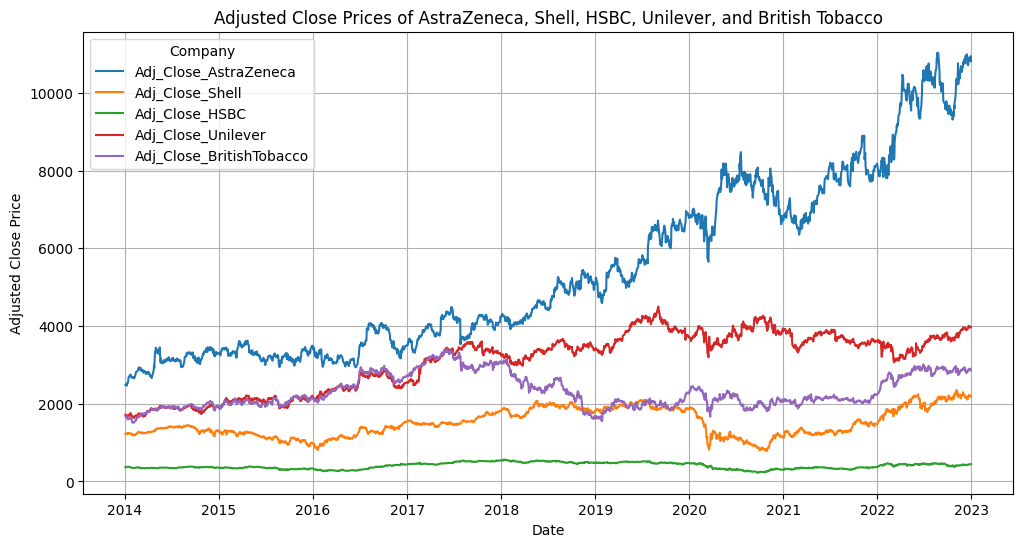

In [8]:
# Transform data to long format
long_df = pd.melt(merged_df, id_vars=['Date'], value_vars=['Adj_Close_AstraZeneca', 'Adj_Close_Shell', 'Adj_Close_HSBC', 'Adj_Close_Unilever', 'Adj_Close_BritishTobacco'],
                  var_name='Company', value_name='Adj_Close')

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=long_df, x='Date', y='Adj_Close', hue='Company')

plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Adjusted Close Prices of AstraZeneca, Shell, HSBC, Unilever, and British Tobacco')
plt.legend(title='Company')
plt.grid(True)
plt.show()

In [ ]:
print(merged_df.describe())

       Adj_Close_AstraZeneca  Adj_Close_Shell  Adj_Close_HSBC  \
count            2270.000000      2270.000000     2270.000000   
mean             5424.615760      1503.873853      402.027996   
std              2263.729399       358.595670       80.027791   
min              2465.229004       775.309631      225.027634   
25%              3388.871094      1229.089203      339.755226   
50%              4617.593506      1429.761780      383.103821   
75%              7276.813477      1855.862152      473.307930   
max             11032.589844      2352.267090      562.671753   

       Adj_Close_Unilever  Adj_Close_BritishTobacco  
count         2270.000000               2270.000000  
mean          3102.574908               2315.776791  
std            753.897706                430.073581  
min           1634.818848               1509.605469  
25%           2358.833435               1989.197906  
50%           3374.385376               2151.329346  
75%           3677.381836           

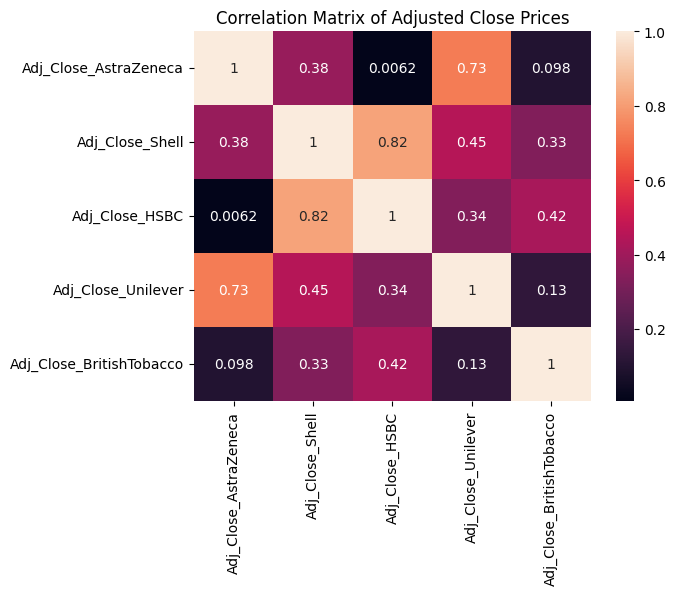

In [ ]:
# Use Heatmap to view correlation matrix

adj_close_columns = ['Adj_Close_AstraZeneca', 'Adj_Close_Shell', 'Adj_Close_HSBC', 'Adj_Close_Unilever', 'Adj_Close_BritishTobacco']
correlation_matrix = merged_df[adj_close_columns].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Adjusted Close Prices')
plt.show()

In [ ]:
merged_df.head()

,Adj_Close_AstraZeneca,Adj_Close_Shell,Adj_Close_HSBC,Adj_Close_Unilever,Adj_Close_BritishTobacco,AstraZeneca_MA20,AstraZeneca_MA50
Date,,,,,,,
2014-03-14,2797.531494,1233.545044,339.283264,1681.060791,1740.162598,2874.367493,2749.614263
2014-03-17,2838.640625,1238.437988,338.659302,1680.351440,1727.478394,2874.858789,2756.401851
2014-03-18,2844.359863,1251.677002,339.169800,1694.531616,1755.815186,2874.958899,2763.803882
2014-03-19,2843.645264,1246.784424,335.709412,1693.823242,1745.020630,2874.619336,2771.372207
2014-03-20,2818.264648,1240.164673,337.070801,1685.314453,1735.034790,2872.689014,2778.113438


In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError

In [9]:
# Extract the relevant column for Shell's adjusted close prices
shell_prices = merged_df[['Date', 'Adj_Close_Shell']]

# Set 'Date' as index
shell_prices.set_index('Date', inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(shell_prices)

# Function to create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Sequence length
seq_length = 60

# Create sequences
X, y = create_sequences(scaled_data, seq_length)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (1768, 60, 1) (1768, 1)
Testing data shape: (443, 60, 1) (443, 1)


In [10]:
# Build the RNN model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error', \
              metrics=[MeanAbsoluteError(), RootMeanSquaredError()])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
50/50 [==============================] - 9s 79ms/step - loss: 0.0227 - mean_absolute_error: 0.1023 - root_mean_squared_error: 0.1508 - val_loss: 0.0022 - val_mean_absolute_error: 0.0366 - val_root_mean_squared_error: 0.0464
Epoch 2/20
50/50 [==============================] - 3s 53ms/step - loss: 0.0043 - mean_absolute_error: 0.0497 - root_mean_squared_error: 0.0659 - val_loss: 0.0016 - val_mean_absolute_error: 0.0300 - val_root_mean_squared_error: 0.0405
Epoch 3/20
50/50 [==============================] - 3s 53ms/step - loss: 0.0036 - mean_absolute_error: 0.0448 - root_mean_squared_error: 0.0597 - val_loss: 0.0015 - val_mean_absolute_error: 0.0289 - val_root_mean_squared_error: 0.0384
Epoch 4/20
50/50 [==============================] - 4s 81ms/step - loss: 0.0036 - mean_absolute_error: 0.0449 - root_mean_squared_error: 0.0600 - val_loss: 0.0014 - val_mean_absolute_error: 0.0285 - val_root_mean_squared_error: 0.0381
Epoch 5/20
50/50 [==============================] - 3s 63ms/

14/14 [==============================] - 0s 16ms/step - loss: 8.6067e-04 - mean_absolute_error: 0.0211 - root_mean_squared_error: 0.0293
Test Loss: 0.0008606708142906427
Test MAE: 0.021101029589772224
Test RMSE: 0.029337191954255104
14/14 [==============================] - 0s 23ms/step
R² score: 0.983599368337538


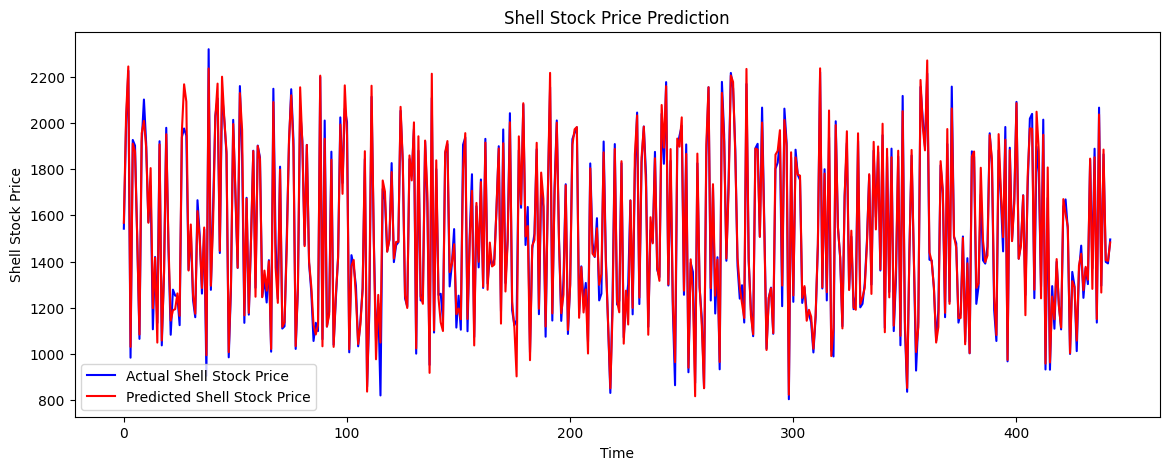

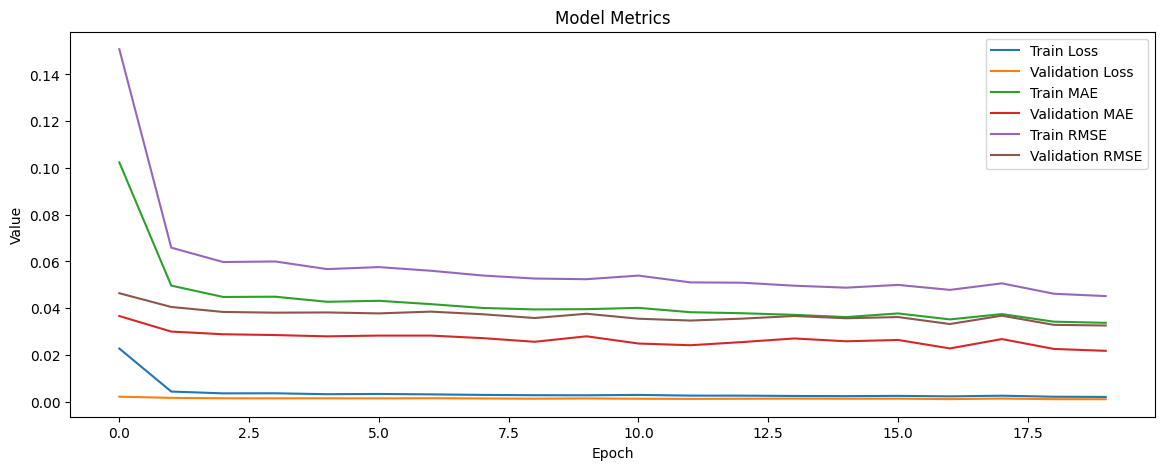

In [13]:
from sklearn.metrics import r2_score

# Evaluate the model
loss, mae, rmse = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test MAE:", mae)
print("Test RMSE:", rmse)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverse transform the test data for plotting
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

r2 = r2_score(y_test_scaled, predictions)
print(f'R² score: {r2}')


# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(y_test_scaled, color='blue', label='Actual Shell Stock Price')
plt.plot(predictions, color='red', label='Predicted Shell Stock Price')
plt.title('Shell Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Shell Stock Price')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.plot(history.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('Model Metrics')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()